In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path

DATA = Path("data/raw_set.csv")

# Load dataset from CSV
df = pd.read_csv(DATA)


In [14]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [15]:
print("-----------------")
df.info()
print("-----------------")
df.nunique()


-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week) 

Age                                42
Gender                              2
Weight (kg)                       616
Height (m)                         51
Max_BPM                            42
Avg_BPM                            50
Resting_BPM                        25
Session_Duration (hours)          148
Calories_Burned                   925
Workout_Type                        7
Fat_Percentage                    242
Water_Intake (liters)              23
Workout_Frequency (days/week)       4
Experience_Level                    3
BMI                              1074
dtype: int64

In [16]:
df.isna().sum().sort_values(ascending=False)

Gender                           71
Workout_Type                     61
Workout_Frequency (days/week)    58
Experience_Level                 57
Avg_BPM                          30
BMI                              30
Height (m)                       26
Water_Intake (liters)            24
Session_Duration (hours)         23
Calories_Burned                  23
Weight (kg)                      22
Max_BPM                          21
Resting_BPM                      19
Fat_Percentage                   16
Age                              10
dtype: int64

In [17]:
#Kategorien 
# Cast column types
df["Gender"] = df["Gender"].astype("category")
# Cast column types
df["Workout_Type"] = df["Workout_Type"].astype("category")

df["Max_BPM"] = pd.to_numeric(df["Max_BPM"], errors="coerce")

In [18]:
#für numerische Zeilen
num_cols = df.select_dtypes(include='number').columns


for c in num_cols:
 # Fill missing values
 df[c] = df[c].fillna(df[c].median())


#für Kategorien 
for c in ['Gender', 'Workout_Type']:
 # Fill missing values
 df[c] = df[c].fillna(df[c].mode().iloc[0])

df.isna().sum().sort_values(ascending=False)

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [19]:

def clean_workout_type(df: pd.DataFrame, col: str = "Workout_Type") -> pd.DataFrame:
    # Cast column types
    s = df[col].astype("string")  # preserves <NA>, does not convert to 'nan'

    # remove control and literal escape sequences
    s = (s
         .str.replace(r'\\[nt]', '', regex=True)            # comment translated to English
         .str.replace(r'[\r\n\t]', ' ', regex=True)         # replace actual CR/LF/TAB with a space
         .str.replace(r'[\u200B-\u200D\uFEFF]', '', regex=True)  # zero-width, BOM
         .str.strip()
         .str.replace(r'\s+', ' ', regex=True)              # collapse multiple spaces into one
    )

    # normalize to canonical forms
    canon = {'strength': 'Strength', 'cardio': 'Cardio', 'yoga': 'Yoga', 'hiit': 'HIIT'}
    mapped = s.str.lower().map(canon)
    s = mapped.where(mapped.notna(), s)  # if mapping fails — keep the cleaned original value

    # Cast column types
    df[col] = s.astype('category')
    return df
df = clean_workout_type(df, "Workout_Type")
print(df["Workout_Type"].value_counts(dropna=False))


Workout_Type
Strength    537
Cardio      439
Yoga        435
HIIT        389
Name: count, dtype: int64


               Age  Weight (kg)   Height (m)      Max_BPM      Avg_BPM  \
count  1800.000000  1800.000000  1800.000000  1800.000000  1800.000000   
mean     34.467222    67.578444     1.739100   180.245000   146.255000   
std      12.281940    19.741219     0.122998    11.384311    15.092119   
min      18.000000    40.000000     1.500000   160.000000   120.000000   
25%      23.750000    52.575000     1.660000   170.000000   134.000000   
50%      33.000000    65.300000     1.730000   181.000000   146.000000   
75%      45.000000    80.000000     1.820000   190.000000   159.000000   
max      59.000000   129.900000     2.000000   199.000000   169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count  1800.000000               1800.000000      1800.000000     1800.000000   
mean     63.962222                  1.391322      1033.651667       23.516389   
std       7.895208                  0.369962       325.946144        5.839887   
min      

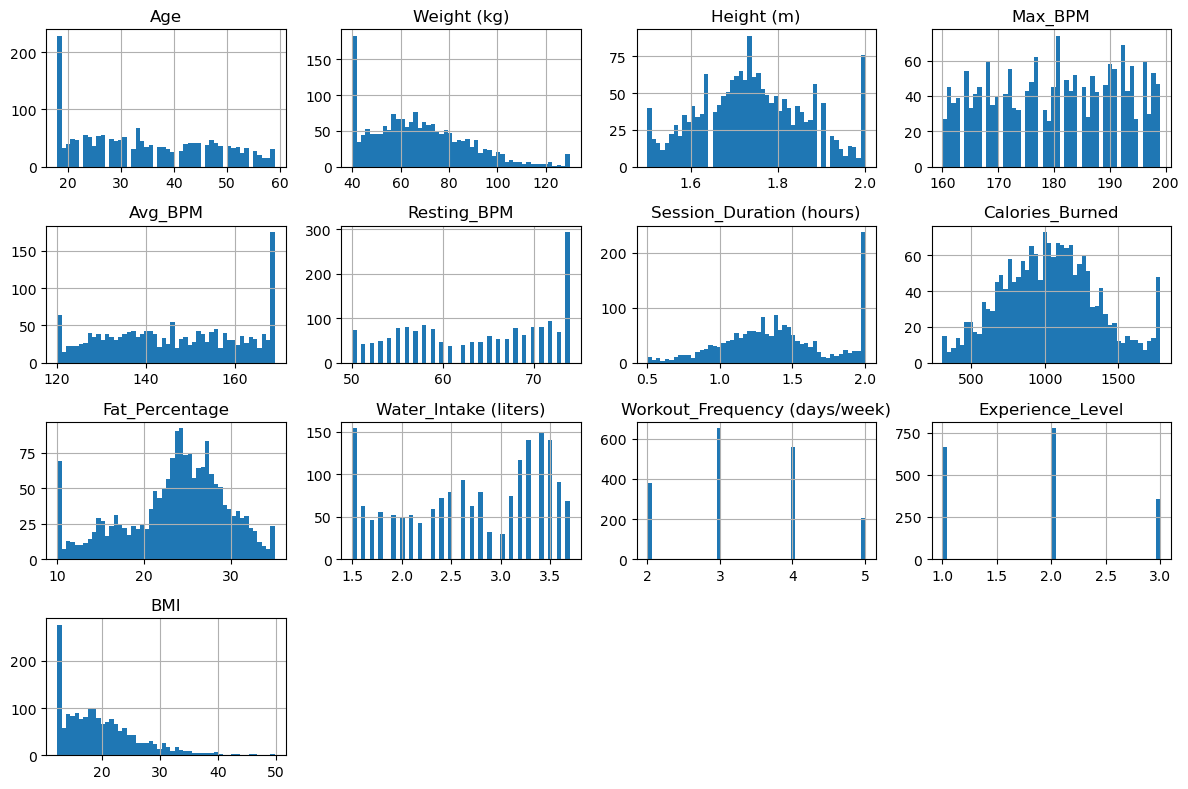

In [20]:
print(df.describe())
df.hist(bins=50, figsize=(12, 8))
# Configure Matplotlib plot
plt.tight_layout()

In [21]:
df['Calories_per_hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
df["Water_per_kg"] = df["Water_Intake (liters)"] / df["Weight (kg)"]
df["HRR"] = df["Max_BPM"] - df["Resting_BPM"]
df["Rel_Intensity"] = (df["Avg_BPM"] - df["Resting_BPM"]) / df["HRR"]  

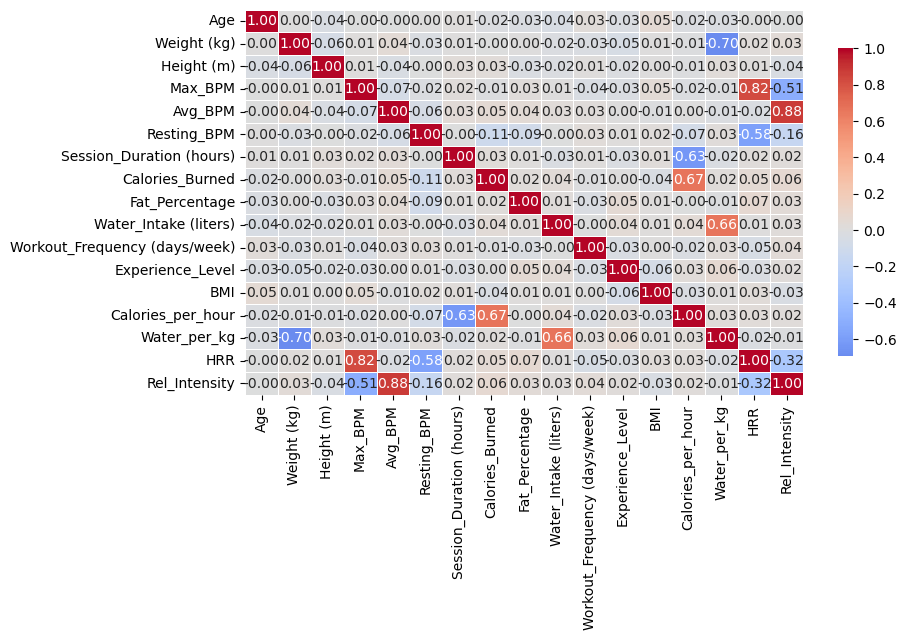

In [22]:
only_num = df.select_dtypes(include='number')

# Configure Matplotlib plot
plt.figure(figsize=(9, 5))
# Plot with Seaborn
sns.heatmap(
    only_num.corr(),
    annot=True,
    fmt=".2f",  # round to two decimals
    cmap="coolwarm",  # use a more contrasted palette
    center=0,  # center the color scale at zero
    linewidths=0.5,  # add divider lines
    cbar_kws={"shrink": 0.8}  # compact colorbar
)
# Configure Matplotlib plot
plt.grid(False)
# Save figure to file
plt.savefig("out/img/heatmap.png", dpi=300, bbox_inches="tight")
# Configure Matplotlib plot
plt.show()



In [23]:
#one-hot

df_ml = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)


#mastab 

from sklearn.preprocessing import StandardScaler 
scale_cols = ["Weight (kg)","Height (m)","Avg_BPM","Max_BPM","Resting_BPM",
              "Session_Duration (hours)","Fat_Percentage","BMI","Rel_Intensity",
              "Calories_per_hour","Water_per_kg"]
scaler = StandardScaler()
df_ml[scale_cols] = scaler.fit_transform(df_ml[scale_cols])

In [24]:
#save 

df_clean = df.copy()

# Export table to CSV
df_clean.to_csv('data/clean_set.csv', index=False)